# Machine Learning in Python 2
- Using the Health Care Cost dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/data.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Describe the data to view the summary statistics for each numeric column
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

- Dataset is complete with no missing data.
- 1338 observations with 7 columns.
- Age distribution between 18-64 years old.
- Ratio of non-smokers to smokers is 1064:274, around 4:1.
- Average mean medical cost is USD 13270, median USD 9382

***

## Visual EDA
- Plot some visuals to gain better insights on the data.

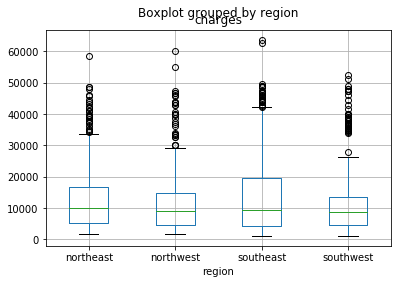

In [5]:
# Plot a boxplot on the charges by region
data.boxplot(column='charges', by='region')

- We can see that the charges distribution are generally even on all region. 
- This tells us that the region does not affect the amount being charged on the patient.

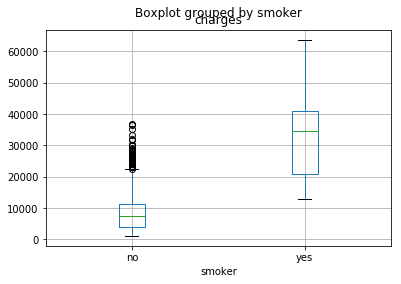

In [6]:
# Plot a boxplot on the charges by smoker
data.boxplot(column='charges', by='smoker')

- The boxplot shows significant difference between smokers and non-smokers.
- Smokers tend to pay more on healthcare costs.
- We can assume that the reason smokers have to pay more on healthcare is because they tend to fall sick more often.

Text(0, 0.5, 'Health Charges')

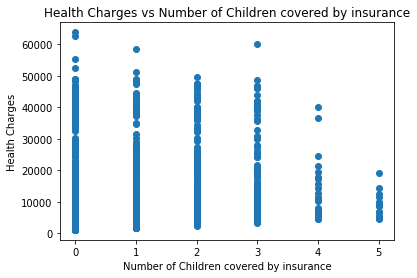

In [9]:
plt.scatter(data['children'], data['charges'])
plt.title('Health Charges vs Number of Children covered by insurance')
plt.xlabel('Number of Children covered by insurance')
plt.ylabel('Health Charges')

- As the number of children covered by insurance increases, the health charges seem to decrease. 

In [10]:
# Group smoker data by sex and smoker columns and count the entries in the smoker column
smoker_data = data.groupby(['sex', 'smoker'])['smoker'].count()

In [11]:
smoker_data

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [12]:
# Calculate the percentage of female smoker
female_smoker = smoker_data[('female', 'yes')]/smoker_data[('female')].sum()*100
print('{:.0f}% of the female are smokers'.format(female_smoker))

17% of the female are smokers


In [13]:
# Calculate the percentage of male smoker
male_smoker = smoker_data[('male', 'yes')]/smoker_data[('male')].sum()*100
print('{:.0f}% of the male are smokers'.format(male_smoker))

24% of the male are smokers


***

## Deriving New Variable
- The idea behind creating a new variable obesity is that, 30 is the bmi threshold for the obesity.
- We all know that obesity plays a huge role in a person's health.

In [17]:
# Create a new variable named obesity. Entries having bmi > 30
data = data.assign(obesity=data['bmi']>30)

# Change the data type from Boolean to String for easier mapping
data['obesity'] = data['obesity'].astype('str')

data.head()

,age,sex,bmi,children,smoker,region,charges,obesity
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [18]:
# Replace True/False to yes/no
data['obesity'] = data['obesity'].map({'True': 'yes', 'False': 'no'})

data.head()

,age,sex,bmi,children,smoker,region,charges,obesity
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no


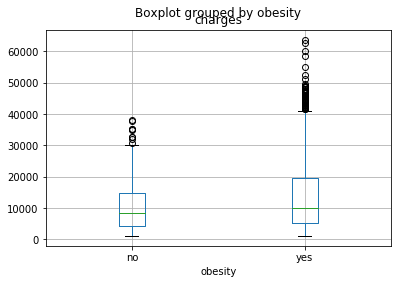

In [19]:
# Plot a boxplot on the charges by the obesity
data.boxplot(column='charges', by='obesity')

- From the box plot, although obese and non-obese people has the same median medical expenses, but their average expenditure differ by almost USD 5000.

In [20]:
# Calculate the correlation matrix. All features not strongly correlated to charges.
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


***

## Machine Learning Algorithm: Regression

In [26]:
data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'obesity'],
      dtype='object')

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extract 'data' and 'class/label' into X and y
X = data.iloc[:,:-2]
y = data.iloc[:,-2]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [55]:
# Convert categorical variable into binary 
X['sex'] = X['sex'].map({'female': 0, 'male': 1})
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})
X = X.drop(['region'], axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [56]:
# Split dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Instantiate LinearRegression object
linear_reg = LinearRegression()

# Train model on training data
linear_reg.fit(X_train, y_train)

# Predict trained model on test data
prediction = linear_reg.predict(X_test)

# Calculate the performance
rsquared = linear_reg.score(X_test, y_test)

In [57]:
print('The R-Squared score for linear regression model is {:.2f}%'.format(rsquared*100))

The R-Squared score for linear regression model is 73.38%


### Ridge Regression

In [58]:
from sklearn.linear_model import Ridge

# Instantiate Ridge Regression object
ridge = Ridge(alpha=0.05, normalize=True)

# Train model on training data
ridge.fit(X_train, y_train)

# Predict trained model on test data
ridge_prediction = ridge.predict(X_test)

# Calculate the performance
ridge_score = ridge.score(X_test, y_test)

In [59]:
print('The R-Squared score for Ridge regression model is {:.2f}%'.format(ridge_score*100))

The R-Squared score for Ridge regression model is 73.55%


***

## Cross validation

### K-Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

cv_results_linreg = cross_val_score(linear_reg, X, y, cv =10)
cv_results_ridge = cross_val_score(ridge, X, y, cv =10)

print('The cross validation result for linear regression is {:.2f}%'.format(np.mean(cv_results_linreg)*100))
print('The cross validation result for Ridge regression is {:.2f}%'.format(np.mean(cv_results_ridge)*100))

The cross validation result for linear regression is 74.42%
The cross validation result for Ridge regression is 74.29%


### Random Sampling Cross Validation

In [62]:
# Perform Random Sampling Cross Validation

from sklearn.model_selection import ShuffleSplit

# Instantiate Random Sampling CV Object
rs = ShuffleSplit(n_splits=10, test_size=.3, random_state=10)

# Create empty lists to store score for kNN and RF
randomcv_linreg = []
randomcv_ridge = []

# Generate train and test index using random splitting via the split() method
# Flatten array using ravel() to avoid warnings (optional)
for train_index, test_index in rs.split(X):
    linear_reg.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    ridge.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    
    # Append scoring/accuracy for each iteration in list
    randomcv_linreg.append(linear_reg.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    randomcv_ridge.append(ridge.score(X.loc[test_index], y.loc[test_index].values.ravel()))

# Calculate the average of all iteration    
print('The random sampling cross validation result ({} iterations) for linear regression is {:.2f}%'
      .format(rs.get_n_splits(X),np.mean(randomcv_linreg)*100))    
print('The random sampling cross validation result ({} iterations) for Ridge regression is {:.2f}%'
      .format(rs.get_n_splits(X),np.mean(randomcv_ridge)*100))

The random sampling cross validation result (10 iterations) for linear regression is 73.75%
The random sampling cross validation result (10 iterations) for Ridge regression is 73.60%


In [63]:
accuracies1 = pd.DataFrame(data=
                    {'Cross Validation Methods': ['K-Fold', 'Random Sampling'], 
                     'Linear Regression': [np.mean(cv_results_linreg)*100, np.mean(randomcv_linreg)*100], 
                     'Ridge Regression': [np.mean(cv_results_ridge)*100, np.mean(randomcv_ridge)*100]})

accuracies1

,Cross Validation Methods,Linear Regression,Ridge Regression
0,K-Fold,74.419900,74.294194
1,Random Sampling,73.751217,73.597430


#### Linear Regression is slightly better than Ridge Regression.